In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Necessary libraries

In [2]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchsummary import summary

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [4]:
# SEED = 1

# # CUDA?
# cuda = torch.cuda.is_available()
# print("CUDA Available?", cuda)

# # For reproducibility
# torch.manual_seed(SEED)

# if cuda:
#     torch.cuda.manual_seed(SEED)

Load all the modules

In [4]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/dataload.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/model_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/run_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/utils.py /content

In [5]:
import dataload
import model_v1
import run_v1
import utils

from dataload import Draw, AlbumentationImageDataset, args, loader
from model_v1 import CustomResNet, return_summary
from run_v1 import Performance, scores, train, test
from utils import allot_device, Plots, plot_metrics, printTrainTest_LossAcc

In [6]:
train_loader,test_loader = loader.load_data(512)
print(len(train_loader),len(test_loader))

100%|██████████| 170498071/170498071 [00:05<00:00, 29827081.40it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
98 20


<Figure size 640x480 with 0 Axes>

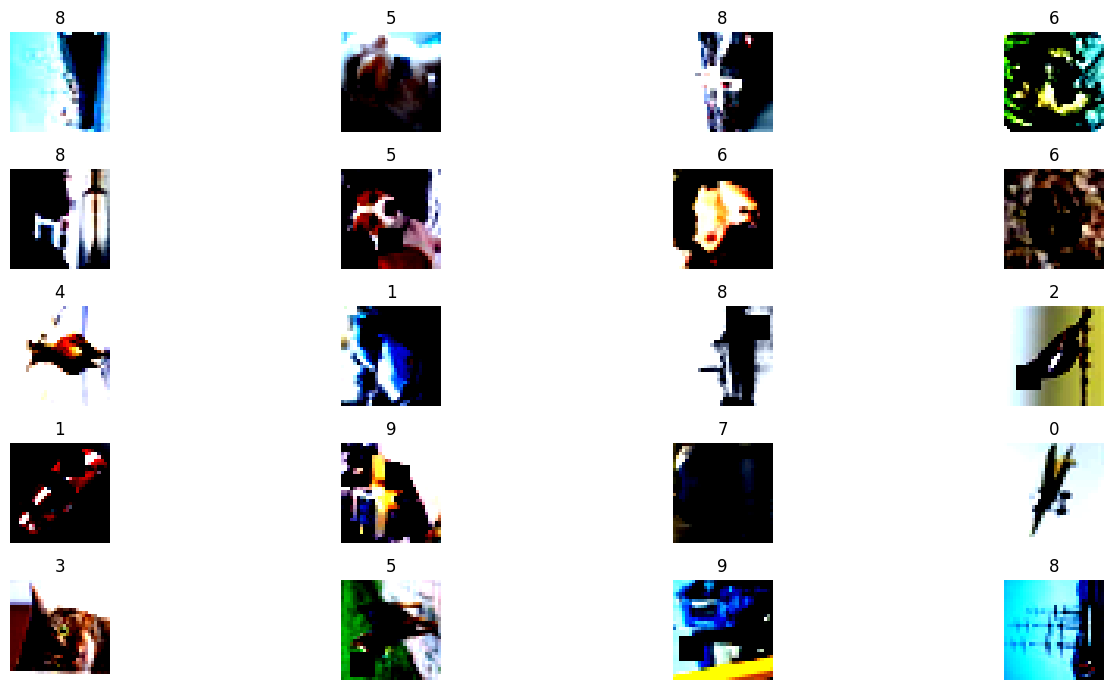

In [7]:
#train_data
Plots(None,21,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

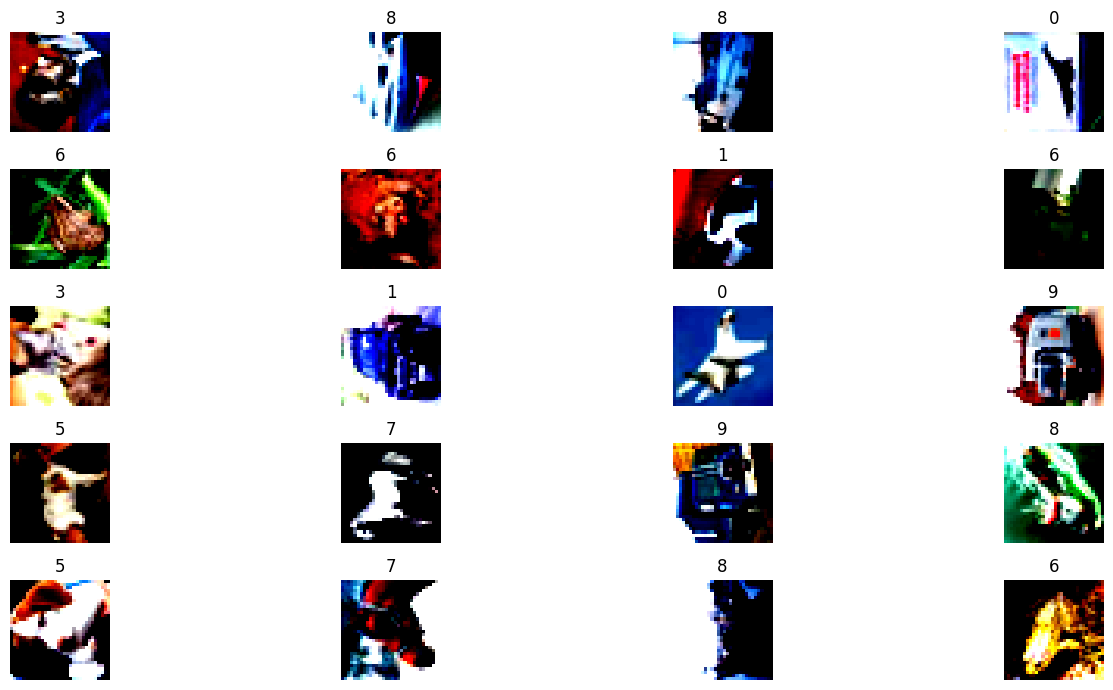

In [8]:
#test_data
Plots(None,21,test_loader).plot_images()

In [9]:
 # Setting up the device
device = allot_device(142)
print(f"{device} is available")

cuda is available


In [10]:
model = CustomResNet().to(device)

return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [11]:
!pip install torch_lr_finder

In [12]:
from torch_lr_finder import LRFinder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.51E-02


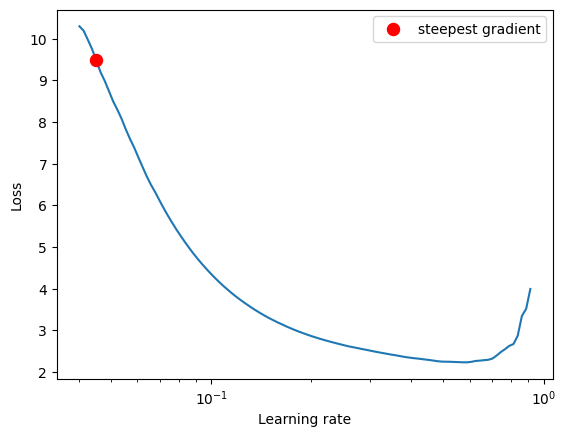

In [13]:
model = CustomResNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [14]:
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 24

scheduler = OneCycleLR(
        optimizer,
        max_lr=4.51E-02,
        steps_per_epoch=len(train_loader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )
criterion = nn.CrossEntropyLoss()
#perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses, train_acc = train(model, device, train_loader, optimizer, epoch, criterion,scheduler)
    test_losses, test_acc = test(model, device, test_loader, criterion)
    #scheduler.step()

EPOCH: 0


Loss=1.102307915687561 Batch_id=97 Accuracy=45.76: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.0029, Accuracy: 5257/10000 (52.57%)

EPOCH: 1


Loss=1.0022187232971191 Batch_id=97 Accuracy=64.53: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 0.0022, Accuracy: 6123/10000 (61.23%)

EPOCH: 2


Loss=0.6549638509750366 Batch_id=97 Accuracy=70.66: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.0016, Accuracy: 7297/10000 (72.97%)

EPOCH: 3


Loss=0.6525334119796753 Batch_id=97 Accuracy=74.59: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.0016, Accuracy: 7133/10000 (71.33%)

EPOCH: 4


Loss=0.5803270936012268 Batch_id=97 Accuracy=76.16: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.0017, Accuracy: 7093/10000 (70.93%)

EPOCH: 5


Loss=0.7073798179626465 Batch_id=97 Accuracy=76.41: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.0019, Accuracy: 6759/10000 (67.59%)

EPOCH: 6


Loss=0.6611764430999756 Batch_id=97 Accuracy=78.10: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0015, Accuracy: 7492/10000 (74.92%)

EPOCH: 7


Loss=0.6422396898269653 Batch_id=97 Accuracy=78.19: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.0023, Accuracy: 6579/10000 (65.79%)

EPOCH: 8


Loss=0.6761603951454163 Batch_id=97 Accuracy=78.82: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.0021, Accuracy: 6606/10000 (66.06%)

EPOCH: 9


Loss=0.5988541841506958 Batch_id=97 Accuracy=79.31: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.0015, Accuracy: 7519/10000 (75.19%)

EPOCH: 10


Loss=0.6013756990432739 Batch_id=97 Accuracy=80.01: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0015, Accuracy: 7469/10000 (74.69%)

EPOCH: 11


Loss=0.6079646348953247 Batch_id=97 Accuracy=80.08: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.0018, Accuracy: 7076/10000 (70.76%)

EPOCH: 12


Loss=0.5004971623420715 Batch_id=97 Accuracy=80.28: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0012, Accuracy: 7943/10000 (79.43%)

EPOCH: 13


Loss=0.539477527141571 Batch_id=97 Accuracy=80.95: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0014, Accuracy: 7684/10000 (76.84%)

EPOCH: 14


Loss=0.5987339615821838 Batch_id=97 Accuracy=81.65: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0012, Accuracy: 8080/10000 (80.80%)

EPOCH: 15


Loss=0.5218526124954224 Batch_id=97 Accuracy=82.17: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.0011, Accuracy: 8102/10000 (81.02%)

EPOCH: 16


Loss=0.5528801083564758 Batch_id=97 Accuracy=83.31: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.0010, Accuracy: 8269/10000 (82.69%)

EPOCH: 17


Loss=0.4214129149913788 Batch_id=97 Accuracy=83.85: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0010, Accuracy: 8211/10000 (82.11%)

EPOCH: 18


Loss=0.527631402015686 Batch_id=97 Accuracy=84.32: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.0010, Accuracy: 8284/10000 (82.84%)

EPOCH: 19


Loss=0.4521733820438385 Batch_id=97 Accuracy=86.00: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 0.0008, Accuracy: 8581/10000 (85.81%)

EPOCH: 20


Loss=0.3473241329193115 Batch_id=97 Accuracy=87.27: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0008, Accuracy: 8694/10000 (86.94%)

EPOCH: 21


Loss=0.34495359659194946 Batch_id=97 Accuracy=88.98: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0007, Accuracy: 8734/10000 (87.34%)

EPOCH: 22


Loss=0.2644194960594177 Batch_id=97 Accuracy=91.14: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.0006, Accuracy: 8959/10000 (89.59%)

EPOCH: 23


Loss=0.15012148022651672 Batch_id=97 Accuracy=93.18: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.0005, Accuracy: 9108/10000 (91.08%)



In [28]:
type(test_losses[0])

float

In [30]:
train_losses_new = torch.stack(train_losses).cpu().detach().numpy()
train_acc_new = torch.tensor(train_acc, device = 'cpu')
test_losses_new = torch.tensor(test_losses, device = 'cpu')
test_acc_new = torch.tensor(test_acc, device = 'cpu')

In [31]:
type(train_losses_new)

numpy.ndarray

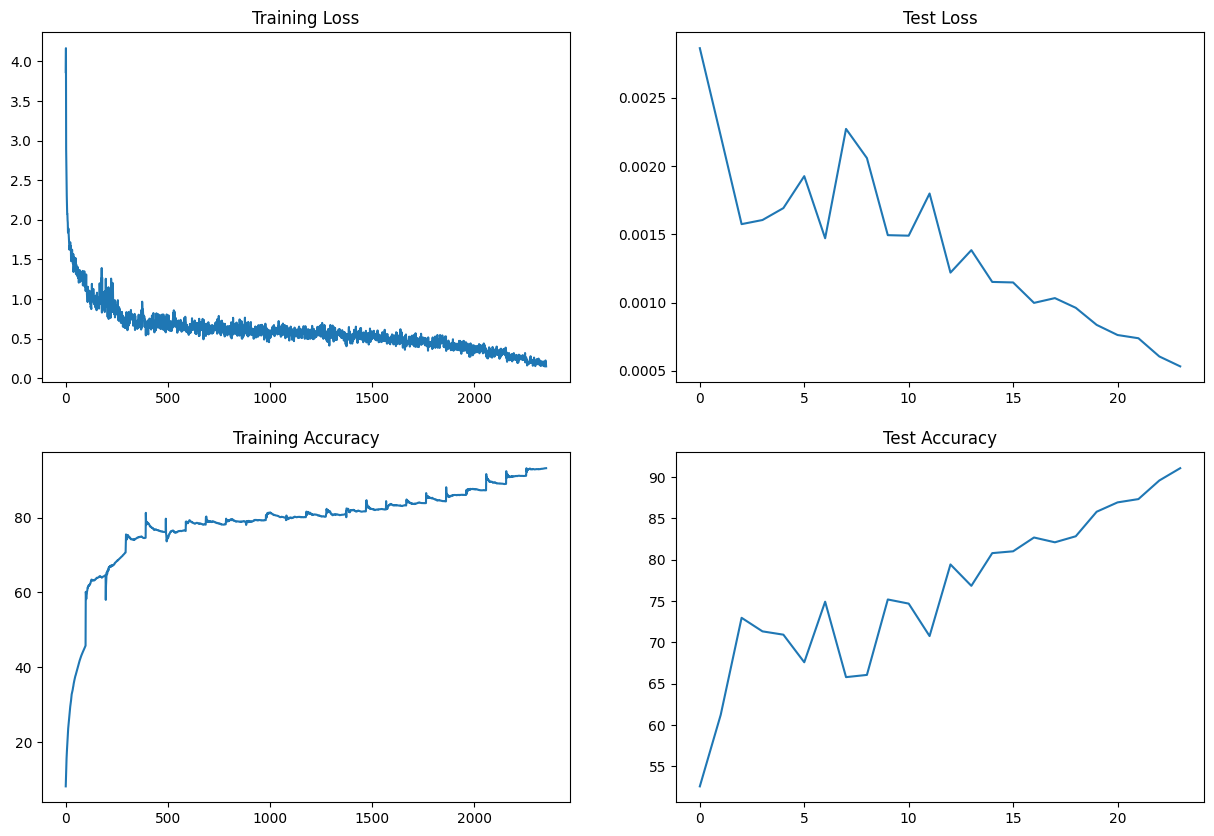

In [32]:
printTrainTest_LossAcc(train_losses_new, train_acc_new, test_losses_new,test_acc_new)

In [33]:
import matplotlib.pyplot as plt

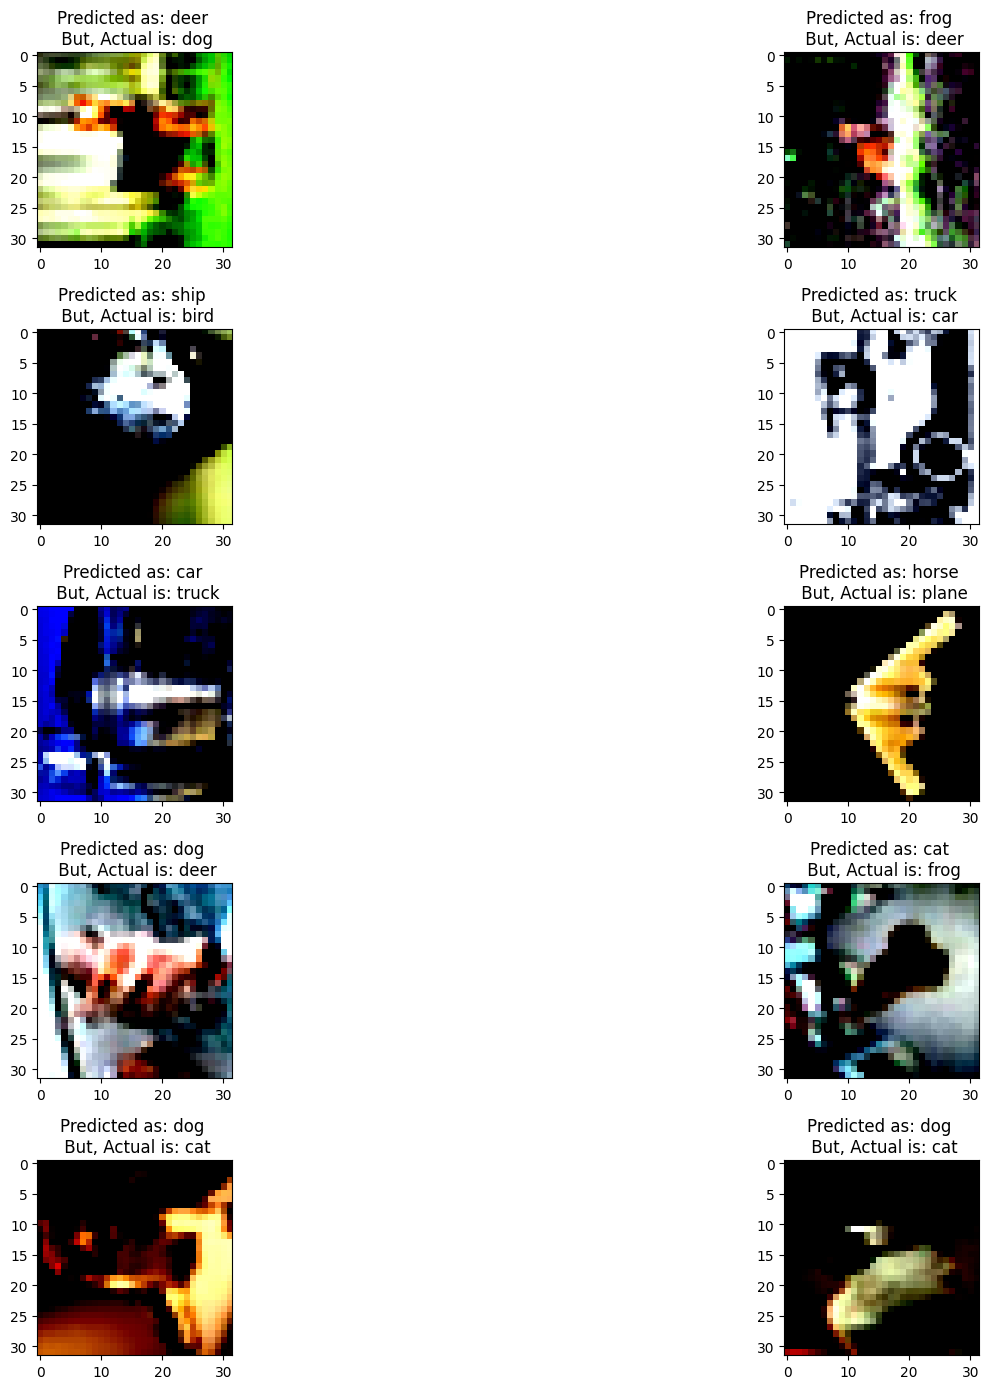

In [34]:
Plots((model,test_loader,device,10)).mis_classified()